In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
import random

In [39]:
def load_results_complete(cancer):
    base = f"C:/Users/colombelli/Desktop/TCC/experiments/{cancer}"
    strategies = ["snf", "correlation", "correlation_multi_omics"]
    percentiles = ["001", "005", "01", "025", "05", "075", "09", "095", "099"]
    
    mlp = pd.read_csv(base+"/mlp/mlp_results.csv")
    mlp['Algorithm'] = "MLP"
    results = {}
    for strategy in strategies:
        results[strategy] = {}
        for percentile in percentiles:
            path = f"{base}/{strategy}/{percentile}/"
            gat = pd.read_csv(path+"gat_results.csv")
            gcn = pd.read_csv(path+"gcn_results.csv")
            
            gat['Algorithm'] = "GAT"
            gcn['Algorithm'] = "GCN"
            
            
            result_df = pd.concat([mlp, gat, gcn])
            result_df = result_df.rename(columns={
                "loss": "Loss",
                "acc": "Accuracy",
                "auc_roc": "AUC-ROC",
                "auc_pr": "AUC-PR",
                "precision": "Precision",
                "recall": "Recall"
            })
            results[strategy][percentile] = result_df
            
    return results


def load_means_accross_thresholds(cancer):
    base = f"C:/Users/colombelli/Desktop/TCC/experiments/{cancer}"
    strategies = ["snf", "correlation", "correlation_multi_omics"]
    percentiles = ["001", "005", "01", "025", "05", "075", "09", "095", "099"]
    
    
    results = {}
    for strategy in strategies:
        gat_df = pd.DataFrame()
        gcn_df = pd.DataFrame()
        for percentile in percentiles:
            path = f"{base}/{strategy}/{percentile}/"
            gat = pd.read_csv(path+"gat_results.csv")
            gcn = pd.read_csv(path+"gcn_results.csv")
            
            col_percentile = percentile[0]+"."+percentile[1:]
            gat_df[col_percentile] = gat.mean()
            gcn_df[col_percentile] = gcn.mean()
        
        gat_df = gat_df.T
        gcn_df = gcn_df.T
        gat_df["Algorithm"] = "GAT"
        gcn_df["Algorithm"] = "GCN"
        
        gat_df = gat_df.reset_index().rename(columns={'index':'Threshold'})
        gcn_df = gcn_df.reset_index().rename(columns={'index':'Threshold'})
        
        df = pd.concat([gat_df, gcn_df]).reset_index()
        df = df.rename(columns={
                "loss": "Loss",
                "acc": "Accuracy",
                "auc_roc": "AUC-ROC",
                "auc_pr": "AUC-PR",
                "precision": "Precision",
                "recall": "Recall"
            })
        results[strategy] = df
            
    return results



strategy_translation = {
    "snf": "SNF",
    "correlation": "CGEN",   # Correlation Gene Expression Network
    "correlation_multi_omics": "CMON"   # Correlation Multi-Omics Network
}
def plot_results():
    base = "C:/Users/colombelli/Desktop/TCC/experiments/plots/"
    metrics = ["AUC-ROC", "AUC-PR", "Precision", "Recall", "Accuracy"]
    cancers = ["COAD", "KIRC", "LUAD"]
    algorithms = ["MLP", "GAT", "GCN"]
    colors = ["#41AFD3", "#A2E454", "#E0823C"]
    
    for cancer in cancers:
        print(cancer)
        results_complete = load_results_complete(cancer)
        
        for strategy, results in results_complete.items():
            for threshold, df in results.items():
                threshold_str = threshold[0]+"."+threshold[1:]
                title = f"{cancer}: {strategy_translation[strategy]} - {threshold_str}"
                file_name_base = f"{base}{cancer}/"
                
                for metric in metrics:
                    random.seed(42)
                    np.random.seed(42)
                    file_name = f"{file_name_base}{metric}/{cancer}_{strategy_translation[strategy]}_{threshold_str}.pdf" 
                    ax = sns.violinplot(data=df, x='Algorithm', y=metric, palette='turbo',
                                        inner=None, linewidth=0, saturation=0.4)
                    ax.set(ylim=(0, 1))
                    sns.boxplot(x='Algorithm', y=metric, data=df, palette='turbo', width=0.3,
                                boxprops={'zorder': 2}, ax=ax).set(title=title)
                    
                    for i, algorithm in enumerate(algorithms):
                        median = df.loc[df['Algorithm']==algorithm][metric].median()
                        plt.axhline(y=median, color=colors[i], linestyle ="--")
                    #return ax, df
                    
                    plt.savefig(file_name)
                    plt.clf()
    return


def plot_results_lines():
    base = "C:/Users/colombelli/Desktop/TCC/experiments/plots/"
    metrics = ["AUC-ROC", "AUC-PR", "Precision", "Recall", "Accuracy"]
    cancers = ["COAD", "KIRC", "LUAD"]
    for cancer in cancers:
        print(cancer)
        results_complete = load_means_accross_thresholds(cancer)
        
        for strategy, results in results_complete.items():
            title = f"{cancer}: {strategy_translation[strategy]}"
            file_name_base = f"{base}{cancer}/"

            for metric in metrics:
                file_name = f"{file_name_base}{metric}/{cancer}_{strategy_translation[strategy]}_growth.pdf"
                sns.lineplot(x="Threshold", y=metric, hue="Algorithm", data=results, 
                             palette=["#A2E454", "#E0823C"], marker="o").set(title=title)
                plt.savefig(file_name)
                plt.clf()
    return

COAD


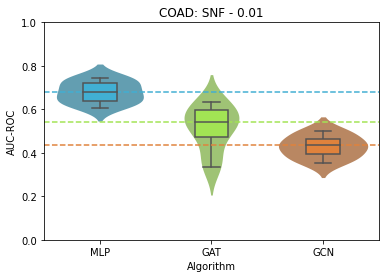

In [38]:
_, df = plot_results()

In [40]:
plot_results()

COAD
KIRC
LUAD


<Figure size 432x288 with 0 Axes>

In [4]:
plot_results_lines()

COAD
KIRC
LUAD


<Figure size 432x288 with 0 Axes>

In [22]:
results=load_means_accross_thresholds("LUAD") 

In [23]:
pd.options.display.float_format = "{:,.2f}".format
for strategy, df in results.items():
    print("\n\n", strategy, "\n")
    print("GAT")
    gat = df.loc[df['Algorithm'] == "GAT"]
    display(gat.T)
    
    print("\nGCN")
    gcn = df.loc[df['Algorithm'] == "GCN"]
    display(gcn.T)



 snf 

GAT


,0,1,2,3,4,5,6,7,8
index,0,1,2,3,4,5,6,7,8
Threshold,0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99
Loss,12.05,12.10,1.10,3.88,1.39,9.94,0.86,1.51,3.73
Accuracy,0.24,0.19,0.22,0.31,0.29,0.25,0.30,0.32,0.45
AUC-ROC,0.49,0.46,0.50,0.57,0.58,0.52,0.60,0.64,0.71
AUC-PR,0.28,0.24,0.28,0.33,0.29,0.28,0.31,0.34,0.44
Precision,0.24,0.19,0.00,0.30,0.03,0.20,0.00,0.28,0.46
Recall,0.24,0.19,0.00,0.10,0.03,0.20,0.00,0.11,0.43
Algorithm,GAT,GAT,GAT,GAT,GAT,GAT,GAT,GAT,GAT



GCN


,9,10,11,12,13,14,15,16,17
index,0,1,2,3,4,5,6,7,8
Threshold,0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99
Loss,0.78,1.02,0.77,0.73,1.36,0.81,0.83,1.21,1.60
Accuracy,0.26,0.26,0.15,0.29,0.32,0.24,0.31,0.31,0.42
AUC-ROC,0.51,0.54,0.43,0.57,0.59,0.55,0.61,0.64,0.69
AUC-PR,0.27,0.28,0.23,0.29,0.31,0.27,0.32,0.33,0.41
Precision,0.00,0.00,0.00,0.00,0.05,0.00,0.00,0.33,0.44
Recall,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.08,0.32
Algorithm,GCN,GCN,GCN,GCN,GCN,GCN,GCN,GCN,GCN




 correlation 

GAT


,0,1,2,3,4,5,6,7,8
index,0,1,2,3,4,5,6,7,8
Threshold,0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99
Loss,1.46,9.58,2.31,1.05,1.51,1.52,4.71,2.04,3.56
Accuracy,0.24,0.32,0.28,0.27,0.30,0.30,0.27,0.34,0.47
AUC-ROC,0.49,0.53,0.48,0.57,0.53,0.53,0.52,0.63,0.71
AUC-PR,0.26,0.31,0.28,0.32,0.32,0.30,0.29,0.34,0.44
Precision,0.15,0.33,0.25,0.25,0.08,0.13,0.28,0.33,0.47
Recall,0.15,0.29,0.24,0.03,0.03,0.11,0.27,0.23,0.42
Algorithm,GAT,GAT,GAT,GAT,GAT,GAT,GAT,GAT,GAT



GCN


,9,10,11,12,13,14,15,16,17
index,0,1,2,3,4,5,6,7,8
Threshold,0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99
Loss,1.39,1.03,1.39,1.01,0.82,1.06,1.14,2.02,2.68
Accuracy,0.40,0.23,0.31,0.34,0.29,0.30,0.36,0.33,0.43
AUC-ROC,0.59,0.48,0.59,0.58,0.60,0.58,0.65,0.64,0.69
AUC-PR,0.35,0.26,0.34,0.35,0.32,0.31,0.35,0.33,0.41
Precision,0.00,0.00,0.00,0.00,0.00,0.00,0.15,0.32,0.43
Recall,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.13,0.37
Algorithm,GCN,GCN,GCN,GCN,GCN,GCN,GCN,GCN,GCN




 correlation_multi_omics 

GAT


,0,1,2,3,4,5,6,7,8
index,0,1,2,3,4,5,6,7,8
Threshold,0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99
Loss,12.11,1.75,3.85,3.32,3.42,1.86,3.00,3.29,3.43
Accuracy,0.35,0.29,0.20,0.23,0.26,0.34,0.29,0.26,0.45
AUC-ROC,0.57,0.56,0.47,0.51,0.53,0.64,0.60,0.52,0.71
AUC-PR,0.32,0.32,0.27,0.26,0.29,0.32,0.30,0.26,0.44
Precision,0.35,0.18,0.21,0.03,0.23,0.26,0.27,0.23,0.46
Recall,0.35,0.18,0.19,0.03,0.06,0.06,0.17,0.16,0.41
Algorithm,GAT,GAT,GAT,GAT,GAT,GAT,GAT,GAT,GAT



GCN


,9,10,11,12,13,14,15,16,17
index,0,1,2,3,4,5,6,7,8
Threshold,0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99
Loss,0.78,1.39,1.04,0.79,1.38,1.10,1.30,2.40,4.43
Accuracy,0.30,0.26,0.30,0.32,0.32,0.29,0.32,0.32,0.41
AUC-ROC,0.54,0.48,0.51,0.55,0.55,0.56,0.62,0.61,0.69
AUC-PR,0.32,0.28,0.29,0.31,0.31,0.28,0.31,0.30,0.40
Precision,0.00,0.00,0.00,0.00,0.00,0.02,0.20,0.27,0.41
Recall,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.13,0.38
Algorithm,GCN,GCN,GCN,GCN,GCN,GCN,GCN,GCN,GCN
